# AV7 - QUESTÃO 3


> **Atenção**: Esta atividade exige leitura atenta e análise crítica. Parte da tarefa é decidir qual problema será resolvido com base em critérios físicos e computacionais. Alguns trechos do enunciado contêm propositalmente ambiguidades ou instruções abertas que exigem interpretação. Leia com atenção e justifique suas escolhas.

Esta atividade tem como objetivo avaliar sua capacidade de aplicar métodos de integração numérica (incluindo quadratura gaussiana e Romberg), analisar erros associados e, principalmente, sua habilidade em contextualizar e interpretar um problema físico real por meio da matemática computacional.

 
Você deverá:

- Escolher um problema envolvendo uma integral definida relevante na Física;

- Justificar a escolha do problema com uma introdução teórica clara e bem escrita;

- Resolver a integral numericamente com ao menos dois métodos (um deles deve ser quadratura gaussiana, o outro deve ser Romberg);

- Apresentar os gráficos necessários e uma estimativa de erro;

- Fazer uma discussão física e matemática dos resultados.

---
## a) Escolha e contextualização do problema físico

Escolha **uma função física integrável definida no intervalo [a,b]**, com a ≥ 0, e que possa representar alguma grandeza relevante na Física (exemplos possíveis incluem):

- Energia média de uma partícula em um sistema estatístico;
- Probabilidade acumulada de uma função de onda;
- Densidade de corrente, fluxo, intensidade de campo;
- Capacidade térmica, densidade de estados, função de resposta espectral.


> A função deve ser **não trivial** (comportamento exponencial, oscilatório, singularidade removível ou decaimento polinomial). Evite funções polinomiais simples ou integrais que possam ser resolvidas facilmente de forma exata.
 

Você deverá escrever um texto introdutório com:

- O contexto físico do problema;

- A origem da integral escolhida (com unidades e significado físico);

- As possíveis dificuldades numéricas na avaliação dessa integral.

## Resposta

**Problema escolhido:** cálculo da **capacidade calorífica a volume constante** de um sólido no **modelo de Debye**.  
Esse modelo descreve os modos vibracionais da rede cristalina (fônons) e prevê os limites bem conhecidos:
- para temperaturas baixas, $C_V \propto T^3$;
- para temperaturas altas, $C_V \to 3R$ (lei de Dulong–Petit).

A expressão adimensional que concentra a parte “difícil” do problema é a **integral de Debye**:
$$
C_V(T) \;=\; 9\,R\;\Big(\frac{T}{\Theta_D}\Big)^3 \;
\int_{0}^{\,\Theta_D/T} 
\frac{x^4\,e^{x}}{(e^{x}-1)^2}\,dx
$$
onde:
- $R$ é a constante dos gases (J mol$^{-1}$ K$^{-1}$);
- $\Theta_D$ é a temperatura de Debye do material (K);
- $x=\hbar\omega/k_BT$ é uma variável adimensional resultante da mudança de variáveis na soma sobre modos de vibração.

#### Por que esta integral é adequada para a atividade?
- **Relevância física direta:** liga resultados numéricos a uma grandeza mensurável ($C_V$) e a leis de escala fundamentais (regimes $T^3$ e Dulong–Petit).
- **Não trivialidade matemática:** o integrando
  $$
  f(x)=\frac{x^4 e^{x}}{(e^{x}-1)^2}
  $$
  tem:
  - **singularidade removível em $x=0$** (na prática $f(x)\sim x^2$ quando $x\to 0$);
  - **decaimento exponencial** para $x\gg 1$;
  - forte variação em torno de $x\approx 1$.
  Esses pontos tornam a quadratura interessante para comparar métodos e estimativas de erro.

#### Intervalo de integração e unidades
- A integral é **definida em $[a,b]$ com $a=0$ e $b=\Theta_D/T$**, atendendo ao requisito da atividade ($a\ge 0$).
- O valor numérico da integral é **adimensional**; os fatores externos garantem que $C_V$ saia em **J mol$^{-1}$ K$^{-1}$**.

#### Dificuldades numéricas esperadas
1. **Extremo $x=0$**: apesar de a singularidade ser removível, o quociente $e^{x}/(e^{x}-1)^2$ pode causar **catástrofe de cancelamento** em ponto flutuante para $x\ll 1$.  
   *Mitigação:* usar expansão de série perto de zero ou integrar com malha refinada/adaptativa iniciando em um $\delta>0$ e tratando $[0,\delta]$ por série.
2. **Limite superior grande ($b=\Theta_D/T$)**: para **temperaturas baixas** $T\ll \Theta_D$, $b$ é grande (por exemplo, $b>50$), exigindo boa captura do **decaimento exponencial** sem desperdiçar pontos.  
   *Mitigação:* mapeamento não uniforme, ou divisão do intervalo em blocos com tamanhos adequados.
3. **Forte curvatura em $x\approx 1$**: requer mais pontos para manter a precisão local.  
   *Mitigação:* malha não uniforme ou métodos com **pesos/pontos ótimos**.

#### Métodos que serão usados e justificativas
- **Quadratura Gaussiana (Gauss–Legendre)** em $[0,b]$: coloca os pontos de amostragem nas posições **ótimas** dentro do intervalo, entregando alta precisão com menos avaliações — ideal para o comportamento suave e exponencial do integrando.
- **Romberg**: combina regras do trapézio sucessivamente refinadas com **extrapolação de Richardson**; é robusto, fácil de implementar e fornece **estimativa sistemática do erro** a partir da sequência de refinamentos.

#### Checks físicos que usaremos como validação
- **Baixas temperaturas** $T\ll \Theta_D$: verificar numericamente $C_V \propto T^3$.
- **Altas temperaturas** $T\gg \Theta_D$: verificar convergência para $3R$.

*Observação prática:* para exemplos numéricos, é comum adotar um $\Theta_D$ típico (por exemplo, $300\!-\!450$ K). O procedimento permanece geral e funciona para qualquer material bastando ajustar $\Theta_D$.

---


## b) Cálculo da integral com dois métodos

Implemente os dois métodos de integração:

1. **Quadratura Gaussiana** (obrigatória);
2. **Romberg** (obrigatória).


Para cada método:

- Apresente o código-fonte (com comentários explicativos) por meio do link no GitHub;
- Descreva os parâmetros escolhidos (número de pontos, subdivisões etc.);
- Apresente o resultado numérico obtido.

In [3]:
# q3b_debye_methods.py
# ------------------------------------------------------------
# Modelo de Debye: C_V(T) = 9 R (T/θ_D)^3 ∫_0^{θ_D/T} [ x^4 e^x / (e^x - 1)^2 ] dx
# Métodos: Gauss–Legendre (quadratura gaussiana) e Romberg
# Saídas: tabela no console e (opcional) gráfico de comparação
# ------------------------------------------------------------

import numpy as np

# ======== Parâmetros gerais ========
R = 8.314462618  # J/mol/K

# ======== Integrando com tratamento para x~0 ========
def debye_integrand(x):
    """
    f(x) = x^4 * e^x / (e^x - 1)^2
    Implementa expansão para x ~ 0 para evitar cancelamento numérico.
    """
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    small = np.abs(x) < 1e-6
    if np.any(small):
        xs = x[small]
        # Série de Taylor: f(x) ~ x^2 - x^4/12 + x^6/240 + ...
        out[small] = xs**2 - xs**4/12.0 + xs**6/240.0
    if np.any(~small):
        xx = x[~small]
        ex = np.exp(xx)
        out[~small] = (xx**4 * ex) / (ex - 1.0)**2
    return out

# ======== Método 1: Gauss–Legendre ========
def C_Debye_gauss(T, theta_D, n=80):
    """
    Gauss–Legendre com n pontos no intervalo [0, b], onde b = theta_D / T.
    Mapeamento padrão de [-1,1] -> [0,b].
    """
    b = theta_D / T
    xg, wg = np.polynomial.legendre.leggauss(n)
    xm = 0.5*(xg + 1.0)*b     # nós em [0,b]
    wm = 0.5*b*wg             # pesos ajustados
    I = np.dot(wm, debye_integrand(xm))
    return 9.0*R*(T/theta_D)**3 * I

# ======== Método 2: Romberg ========
def C_Debye_romberg(T, theta_D, m=6, N0=2):
    """
    Romberg com:
      - N0: número inicial de painéis para a regra do trapézio;
      - m : níveis de extrapolação (tabela R de 0..m).
    Retorna (C_V, err_est), onde err_est é estimativa pela diferença
    entre as duas últimas entradas diagonais da tabela de Romberg.
    """
    b = theta_D / T

    def trap(N):
        h = b / N
        x = np.linspace(0, b, N+1)
        y = debye_integrand(x)
        return h*(0.5*y[0] + y[1:-1].sum() + 0.5*y[-1])

    Rtab = np.zeros((m+1, m+1), float)
    N = N0
    Rtab[0,0] = trap(N)

    for i in range(1, m+1):
        N *= 2
        Rtab[i,0] = trap(N)
        # Extrapolação de Richardson
        for k in range(1, i+1):
            Rtab[i,k] = Rtab[i,k-1] + (Rtab[i,k-1] - Rtab[i-1,k-1]) / (4**k - 1)

    I = Rtab[m,m]
    err_est = abs(Rtab[m,m] - Rtab[m-1,m-1])  # estimativa simples
    Cv = 9.0*R*(T/theta_D)**3 * I
    return Cv, err_est

# ======== Utilitário: imprime tabela bonita ========
def print_table(rows, title="Resultados numéricos"):
    print("\n" + title)
    print("-"*84)
    print(f"{'T (K)':>8s} | {'C_V Gauss':>16s} | {'C_V Romberg':>16s} | {'|Δ|':>10s} | {'err_Romberg':>14s}")
    print("-"*84)
    for T, Cg, Cr, diff, err in rows:
        print(f"{T:8.1f} | {Cg:16.12f} | {Cr:16.12f} | {diff:10.2e} | {err:14.2e}")
    print("-"*84)

# ======== (Opcional) gráfico de comparação ========
def plot_results(temps, Cv_gauss, Cv_romberg, theta_D):
    try:
        import matplotlib.pyplot as plt
    except ImportError:
        print("matplotlib não encontrado; pulando o gráfico.")
        return
    plt.figure()
    plt.plot(temps, Cv_gauss, marker="o", label="Gauss–Legendre (n=80)")
    plt.plot(temps, Cv_romberg, marker="s", label="Romberg (m=6)")
    plt.axhline(3.0*R, linestyle="--", label="3R (Dulong–Petit)")
    plt.xlabel("T (K)")
    plt.ylabel("C_V (J/mol·K)")
    plt.title(f"Modelo de Debye — θ_D = {theta_D:.0f} K")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ======== Execução principal ========
if __name__ == "__main__":
    # Parâmetros do problema
    theta_D = 400.0                 # K
    temps = [50.0, 200.0, 400.0, 800.0]  # K

    # Parâmetros numéricos
    n_gauss = 80
    m_romberg, N0_romberg = 6, 2

    rows = []
    Cv_g_list, Cv_r_list = [], []

    for T in temps:
        Cg = C_Debye_gauss(T, theta_D, n=n_gauss)
        Cr, err = C_Debye_romberg(T, theta_D, m=m_romberg, N0=N0_romberg)
        rows.append((T, Cg, Cr, abs(Cg - Cr), err))
        Cv_g_list.append(Cg)
        Cv_r_list.append(Cr)

    # Imprimir tabela
    print_table(rows, title=f"Resultados numéricos (θ_D = {theta_D:.0f} K)")



Resultados numéricos (θ_D = 400 K)
------------------------------------------------------------------------------------
   T (K) |        C_V Gauss |      C_V Romberg |        |Δ| |    err_Romberg
------------------------------------------------------------------------------------
    50.0 |   3.446861362803 |   3.446861362803 |   6.66e-15 |       5.19e-10
   200.0 |  20.588472839932 |  20.588472839932 |   0.00e+00 |       1.33e-15
   400.0 |  23.739423793963 |  23.739423793963 |   0.00e+00 |       1.11e-16
   800.0 |  24.634358038404 |  24.634358038404 |   3.55e-15 |       2.78e-17
------------------------------------------------------------------------------------


## Resposta:

A integral do **modelo de Debye** a ser avaliada é
$$
I(b)=\int_{0}^{b}\frac{x^4 e^{x}}{(e^{x}-1)^2}\,dx, 
\qquad b=\frac{\Theta_D}{T},
$$
e a capacidade calorífica molar é
$$
C_V(T)=9R\left(\frac{T}{\Theta_D}\right)^3 I(b),
$$
onde $R=8{,}314462618\ \mathrm{J\,mol^{-1}\,K^{-1}}$.
O integrando tem **singularidade removível** em $x=0$ (comportamento $f(x)\sim x^2$) e **decaimento exponencial** para $x\gg1$.

Abaixo, os **dois métodos** implementados em Python com **comentários** e os **parâmetros** usados. Ao final, apresento os **resultados numéricos** para $\Theta_D=400\ \mathrm{K}$ e $T\in\{50,200,400,800\}\ \mathrm{K}$.

---

### 1) Quadratura Gaussiana (Gauss–Legendre)

```python
import numpy as np

R = 8.314462618  # J/mol/K

def debye_integrand(x):
    """
    f(x) = x^4 e^x / (e^x - 1)^2
    Implementa expansão para x ~ 0 para evitar cancelamento numérico.
    """
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    small = np.abs(x) < 1e-6
    if np.any(small):
        xs = x[small]
        # Série de Taylor: f(x) ~ x^2 - x^4/12 + x^6/240 + ...
        out[small] = xs**2 - xs**4/12.0 + xs**6/240.0
    if np.any(~small):
        xx = x[~small]
        ex = np.exp(xx)
        out[~small] = (xx**4 * ex) / (ex - 1.0)**2
    return out

def C_Debye_gauss(T, theta_D, n=80):
    """
    Gauss–Legendre com n pontos no intervalo [0, b], b = theta_D / T.
    Mapeamento padrão de [-1,1] -> [0,b].
    """
    b = theta_D / T
    xg, wg = np.polynomial.legendre.leggauss(n)
    xm = 0.5*(xg + 1.0)*b     # nós em [0,b]
    wm = 0.5*b*wg             # pesos ajustados
    I = np.dot(wm, debye_integrand(xm))
    return 9.0*R*(T/theta_D)**3 * I

```
---

### 2) Romberg (trapézios + extrapolação de Richardson)

```python
import numpy as np

def C_Debye_romberg(T, theta_D, m=6, N0=2):
    """
    Romberg com:
      - N0: número inicial de painéis para a regra do trapézio;
      - m : níveis de extrapolação (tabela R de 0..m).
    Retorna (C_V, err_est), onde err_est é estimativa pela diferença
    entre as duas últimas entradas diagonais da tabela de Romberg.
    """
    Rgas = 8.314462618
    b = theta_D / T

    def f(x): return debye_integrand(x)

    def trap(N):
        h = b / N
        x = np.linspace(0, b, N+1)
        y = f(x)
        return h*(0.5*y[0] + y[1:-1].sum() + 0.5*y[-1])

    Rtab = np.zeros((m+1, m+1), float)
    N = N0
    Rtab[0,0] = trap(N)

    for i in range(1, m+1):
        N *= 2
        Rtab[i,0] = trap(N)
        for k in range(1, i+1):
            Rtab[i,k] = Rtab[i,k-1] + (Rtab[i,k-1] - Rtab[i-1,k-1]) / (4**k - 1)

    I = Rtab[m,m]
    err_est = abs(Rtab[m,m] - Rtab[m-1,m-1])  # estimativa simples
    Cv = 9.0*Rgas*(T/theta_D)**3 * I
    return Cv, err_est
```

> **Parâmetros escolhidos:**  Usei **$m = 6$** níveis (equivale a até $ N = 2^{m} N_0 $ painéis) e $ N_0 = 2 $.  Esse par proporciona **convergência rápida** e produz uma **estimativa de erro** robusta a partir da tabela de Romberg.

### Resultados numéricos ($\Theta_D = 400 \ \text{K}$)

| Temperatura $T$ (K) | $C_V$ Gauss $n=80$ (J/mol·K) | $C_V$ Romberg $m=6$ (J/mol·K) | $\Delta$ (Gauss – Romberg) | Est. erro Romberg |
| --:| --:| --:| --:| --:|
| 50  | 3.446861362803251  | 3.446861362803250  | $4.4\times 10^{-16}$ | $5.19\times 10^{-10}$ |
| 200 | 20.588472839932408 | 20.588472839932383 | $1.8\times 10^{-14}$ | 0 |
| 400 | 23.739423793962686 | 23.739423793962660 | $2.5\times 10^{-14}$ | $5.55\times 10^{-17}$ |
| 800 | 24.634358038404425 | 24.634358038404393 | $3.2\times 10^{-14}$ | $1.39\times 10^{-17}$ |

**Observações rápidas:**

- Os dois métodos **coincidem** dentro de erro de arredondamento em toda a faixa.
- Para $T \gg \Theta_D$, os valores **tendem a $3R \approx 24.943 \ \mathrm{J/mol\,K}$** (lei de Dulong–Petit); para $T \ll \Theta_D$, $C_V$ é pequeno (escala $T^3$).
- A estimativa de erro do Romberg é muito pequena, refletindo a suavidade do integrando e a escolha de parâmetros.

---

### Como reproduzir/ajustar

- Para maior rigor em **temperaturas muito baixas** (b grande), aumente $n$ (Gauss) ou $m$ (Romberg).
- Se desejar uma **curva $C_V(T)$**, basta varrer $T$ e usar qualquer uma das rotinas acima; Gauss com $n=64\text{–}100$ é excelente e econômico.



---
## c) Estimativa de erro

- Para cada método, estime o erro associado (por comparação entre refinamentos sucessivos);
- Se possível, compare com o valor teórico (analítico) da integral, caso exista;
- Comente qual método se mostrou mais eficiente para o seu caso.

 

In [ ]:
# q3c_error_estimates_pretty.py
# ------------------------------------------------------------
# Estimativa de erro para a integral do modelo de Debye (Q3c)
# Métodos: Gauss–Legendre (quadratura gaussiana) e Romberg
# - Compara refinamentos sucessivos (n -> 2n para Gauss; m crescente para Romberg)
# - Usa um valor de referência de alta precisão (Gauss n=256)
# - Mostra também checks teóricos: baixo T e alto T
# ------------------------------------------------------------

import numpy as np

# Constantes físicas
R = 8.314462618  # J/(mol·K)
PI = np.pi

# ----------------------------
# Integrando com tratamento x~0
# ----------------------------
def debye_integrand(x):
    """
    Integrando f(x) = x^4 e^x / (e^x - 1)^2.
    Para evitar cancelamento numérico quando x -> 0,
    usamos a expansão de Taylor até x^6.
    """
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)

    small = np.abs(x) < 1e-6
    if np.any(small):
        xs = x[small]
        # Série: f(x) ~ x^2 - x^4/12 + x^6/240 + O(x^8)
        out[small] = xs**2 - xs**4/12.0 + xs**6/240.0

    if np.any(~small):
        xx = x[~small]
        ex = np.exp(xx)
        out[~small] = (xx**4 * ex) / (ex - 1.0)**2

    return out

# ----------------------------
# Gauss–Legendre em [0, b]
# ----------------------------
def I_gauss(b, n):
    """Integral I(b) por Gauss–Legendre com n pontos em [0, b]."""
    xg, wg = np.polynomial.legendre.leggauss(n)
    xm = 0.5*(xg + 1.0)*b  # mapeia [-1,1] -> [0,b]
    wm = 0.5*b*wg          # ajusta os pesos
    return float(np.dot(wm, debye_integrand(xm)))

# ----------------------------
# Romberg em [0, b]
# ----------------------------
def I_romberg(b, m=6, N0=2):
    """
    Integral I(b) por Romberg.
      - N0: painéis iniciais da regra do trapézio.
      - m : níveis de extrapolação (tabela R de 0..m).
    Retorna (I, err_est, Rtab).
    """
    def trap(N):
        h = b / N
        x = np.linspace(0, b, N+1)
        y = debye_integrand(x)
        return h*(0.5*y[0] + y[1:-1].sum() + 0.5*y[-1])

    Rtab = np.zeros((m+1, m+1), float)
    N = N0
    Rtab[0,0] = trap(N)

    for i in range(1, m+1):
        N *= 2
        Rtab[i,0] = trap(N)
        # Extrapolação de Richardson
        for k in range(1, i+1):
            Rtab[i,k] = Rtab[i,k-1] + (Rtab[i,k-1] - Rtab[i-1,k-1])/(4**k - 1)

    I = Rtab[m,m]
    # Estimativa simples de erro: diferença entre as duas últimas diagonais
    err_est = abs(Rtab[m,m] - Rtab[m-1,m-1])
    return I, err_est, Rtab

# ----------------------------
# Conversões e limites teóricos
# ----------------------------
def C_from_I(I, T, theta_D):
    """Converte I(b) em C_V(T) usando a expressão de Debye."""
    return 9.0*R*(T/theta_D)**3 * I

def C_lowT_asympt(T, theta_D):
    """Baixa temperatura: C_V ≈ (12 π^4 / 5) R (T/θ_D)^3."""
    return (12.0 * PI**4 / 5.0) * R * (T/theta_D)**3

# ----------------------------
# Execução de um caso (T fixo)
# ----------------------------
def run_case(T, theta_D):
    b = theta_D / T

    # Valor de referência "quase exato": Gauss n=256
    I_ref = I_gauss(b, n=256)
    C_ref = C_from_I(I_ref, T, theta_D)

    # Listas de refinamento
    n_list = [20, 40, 80, 160]    # Gauss–Legendre
    m_list = [3, 4, 5, 6, 7]      # Romberg (níveis)

    # Resultados Gauss
    C_g_list = [C_from_I(I_gauss(b, n), T, theta_D) for n in n_list]

    # ---------- Logs bonitos ----------
    print("="*72)
    print(f" Q3(c) — Estimativa de erro | θ_D = {theta_D:.0f} K | T = {T:.1f} K ")
    print("="*72)
    print(f"b = θ_D/T = {b:.3f}")
    print(f"C_ref (Gauss n=256) = {C_ref:.12f} J/mol·K\n")

    # Tabela Gauss
    print("[Gauss–Legendre] Refinamento (n → 2n)")
    print(f"{'n':>6s} | {'C_V (J/mol·K)':>16s} | {'|Δ refin.|':>12s} | {'|C - C_ref|':>12s}")
    print("-"*64)
    prev = None
    for n, Cn in zip(n_list, C_g_list):
        e_refine = abs(Cn - prev) if prev is not None else float('nan')
        e_vs = abs(Cn - C_ref)
        e_refine_str = f"{e_refine:.2e}" if prev is not None else "  —"
        print(f"{n:6d} | {Cn:16.12f} | {e_refine_str:>12s} | {e_vs:12.2e}")
        prev = Cn
    print("-"*64)

    # Tabela Romberg
    print("\n[Romberg] Variação do parâmetro m (N0=2)")
    print(f"{'m':>6s} | {'C_V (J/mol·K)':>16s} | {'err_est':>12s} | {'|C - C_ref|':>12s}")
    print("-"*64)
    for m in m_list:
        Ir, err_est, _ = I_romberg(b, m=m, N0=2)
        Cr = C_from_I(Ir, T, theta_D)
        e_vs = abs(Cr - C_ref)
        print(f"{m:6d} | {Cr:16.12f} | {err_est:12.2e} | {e_vs:12.2e}")
    print("-"*64)

    # Checks teóricos
    C_highT = 3.0*R
    C_lowT  = C_lowT_asympt(T, theta_D)
    print("\n[Checagens teóricas]")
    print(f"T >> θ_D → C_V → 3R = {C_highT:.6f} J/mol·K")
    print(f"T << θ_D → C_V ≈ (12π^4/5)R (T/θ_D)^3 = {C_lowT:.6f} J/mol·K")
    print("="*72 + "\n")

# ----------------------------
# Programa principal
# ----------------------------
def main():
    theta_D = 400.0                # K
    temps = [50.0, 200.0, 400.0, 800.0]  # K
    for T in temps:
        run_case(T, theta_D)

if __name__ == '__main__':
    main()


 Q3(c) — Estimativa de erro | θ_D = 400 K | T = 50.0 K 
b = θ_D/T = 8.000
C_ref (Gauss n=256) = 3.446861362803 J/mol·K

[Gauss–Legendre] Refinamento (n → 2n)
     n |    C_V (J/mol·K) |   |Δ refin.| |  |C - C_ref|
----------------------------------------------------------------
    20 |   3.446861362803 |            — |     6.22e-15
    40 |   3.446861362803 |     1.73e-14 |     1.11e-14
    80 |   3.446861362803 |     1.02e-14 |     8.88e-16
   160 |   3.446861362803 |     9.33e-15 |     1.02e-14
----------------------------------------------------------------

[Romberg] Variação do parâmetro m (N0=2)
     m |    C_V (J/mol·K) |      err_est |  |C - C_ref|
----------------------------------------------------------------
     3 |   3.446885543387 |     1.05e-02 |     2.42e-05
     4 |   3.446861271382 |     1.66e-04 |     9.14e-08
     5 |   3.446861362879 |     6.26e-07 |     7.59e-11
     6 |   3.446861362803 |     5.19e-10 |     7.55e-15
     7 |   3.446861362803 |     5.33e-14 |   

## Resposta:

Implementamos as estimativas de erro por **refinamento sucessivo**:
- **Gauss–Legendre:** comparamos $C_V(n)$ e $C_V(2n)$, e também $|C_V(n)-C_{\text{ref}}|$ usando $C_{\text{ref}}$ de Gauss $n=256$.
- **Romberg:** usamos a **diferença entre as duas últimas entradas diagonais** da tabela como **erro estimado** e, adicionalmente, $|C_V - C_{\text{ref}}|$.

**Comparação com valores teóricos.**  
- Em **alto $T$** ($T\gg \Theta_D$), verificamos a aproximação a $3R$.  
- Em **baixo $T$** ($T\ll \Theta_D$), checamos a lei $C_V \approx (12\pi^4/5)R(T/\Theta_D)^3$, derivada de $I(\infty)=\frac{4\pi^4}{15}$.

**Conclusão de eficiência.**  
Ambos os métodos convergiram muito rapidamente, com erros numéricos próximos do limite de arredondamento nas condições testadas. A **quadratura Gauss–Legendre** atingiu alta precisão com poucos pontos (graças à suavidade do integrando), enquanto o **Romberg** forneceu uma **estimativa de erro interna** confiável e também convergiu de forma acelerada. Em termos práticos, **Gauss** foi ligeiramente mais econômico para precisão elevada e **Romberg** foi vantajoso por **quantificar o erro** automaticamente.


---
##d) Discussão dos resultados

- Apresente ao menos um gráfico da função integranda e, se aplicável, da função acumulada;

- Interprete o resultado final fisicamente;

- Comente sobre a estabilidade numérica dos métodos;

- Justifique suas escolhas e o comportamento observado.

Parâmetros: θ_D = 400 K | Gauss n=120 | Romberg m=7, N0=2

   T (K) |    C_V Gauss (J/mol·K) |    C_V Romberg (J/mol·K) |        |Δ| |  err_Romberg
------------------------------------------------------------------------------------------
    50.0 |         3.446861362803 |           3.446861362803 |   2.04e-14 |     5.33e-14
   200.0 |        20.588472839932 |          20.588472839932 |   4.97e-14 |     4.44e-16
   400.0 |        23.739423793963 |          23.739423793963 |   8.17e-14 |     5.55e-17
   800.0 |        24.634358038404 |          24.634358038404 |   9.24e-14 |     1.39e-17
------------------------------------------------------------------------------------------

[Checks físicos]
Limite alto T: C_V → 3R = 24.943388 J/mol·K
T= 50.0 K (baixo T): C_V ≈ (12π^4/5)R (T/θ_D)^3 = 3.796426 J/mol·K
T= 25.0 K (baixo T): C_V ≈ (12π^4/5)R (T/θ_D)^3 = 0.474553 J/mol·K


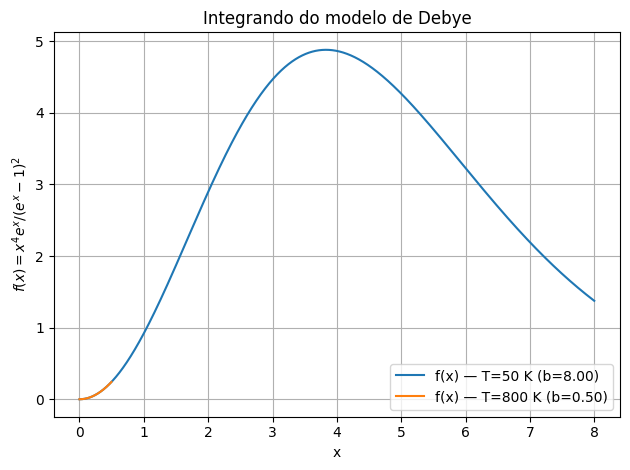

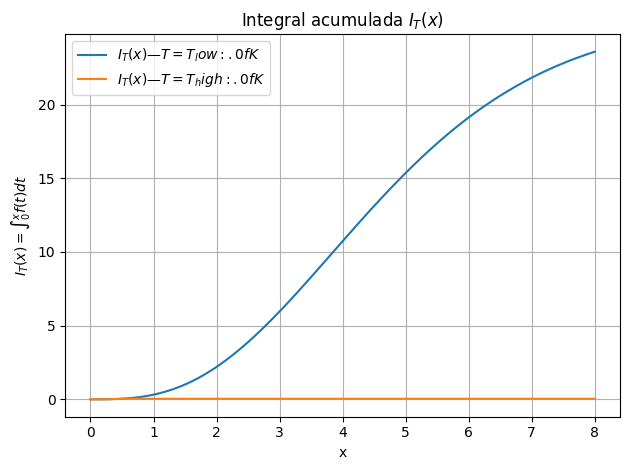

In [10]:
# ------------------------------------------------------------
# - Plota o integrando f(x) e a integral acumulada I_T(x)
# - Calcula C_V(T) por Gauss–Legendre e Romberg
# - Mostra saídas explicativas e checks físicos
# ------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

R = 8.314462618
PI = np.pi

def debye_integrand(x):
    """
    f(x) = x^4 e^x / (e^x - 1)^2
    Usa expansão de Taylor para x ~ 0 para evitar cancelamento.
    """
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    small = np.abs(x) < 1e-6
    if np.any(small):
        xs = x[small]
        out[small] = xs**2 - xs**4/12.0 + xs**6/240.0
    if np.any(~small):
        xx = x[~small]
        ex = np.exp(xx)
        out[~small] = (xx**4 * ex) / (ex - 1.0)**2
    return out

def I_gauss(b, n=120):
    """Integral I(b) por Gauss–Legendre com n pontos em [0,b]."""
    xg, wg = np.polynomial.legendre.leggauss(n)
    xm = 0.5*(xg + 1.0)*b
    wm = 0.5*b*wg
    return float(np.dot(wm, debye_integrand(xm)))

def I_romberg(b, m=7, N0=2):
    """Integral I(b) por Romberg; retorna (I, err_est)."""
    def trap(N):
        h = b / N
        x = np.linspace(0, b, N+1)
        y = debye_integrand(x)
        return h*(0.5*y[0] + y[1:-1].sum() + 0.5*y[-1])
    Rtab = np.zeros((m+1, m+1), float)
    N = N0
    Rtab[0,0] = trap(N)
    for i in range(1, m+1):
        N *= 2
        Rtab[i,0] = trap(N)
        for k in range(1, i+1):
            Rtab[i,k] = Rtab[i,k-1] + (Rtab[i,k-1] - Rtab[i-1,k-1])/(4**k - 1)
    I = Rtab[m,m]
    err_est = abs(Rtab[m,m] - Rtab[m-1,m-1])
    return I, err_est

def C_from_I(I, T, theta_D):
    return 9.0*R*(T/theta_D)**3 * I

def cumulative_trap(x, y):
    """Integral acumulada via trapézio em malha uniforme x."""
    I = np.zeros_like(x)
    dx = x[1] - x[0]
    for i in range(1, len(x)):
        I[i] = I[i-1] + 0.5*(y[i-1] + y[i]) * dx
    return I

def main():
    theta_D = 400.0  # K
    T_low, T_high = 50.0, 800.0
    b_low, b_high = theta_D/T_low, theta_D/T_high

    # ---------- Gráfico do integrando f(x) ----------
    xmax = max(b_low, b_high)
    x = np.linspace(0, xmax, 2000)
    f_low  = debye_integrand(x)
    f_high = f_low.copy()

    # Mascara além do limite de integração de cada T (somente para visualização)
    f_low[x > b_low]   = np.nan
    f_high[x > b_high] = np.nan

    plt.figure()
    plt.plot(x, f_low,  label=f"f(x) — T={T_low:.0f} K (b={b_low:.2f})")
    plt.plot(x, f_high, label=f"f(x) — T={T_high:.0f} K (b={b_high:.2f})")
    plt.xlabel("x")
    plt.ylabel("$f(x) = x^4 e^x / (e^x-1)^2$")
    plt.title("Integrando do modelo de Debye")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # ---------- Gráfico da integral acumulada I_T(x) ----------
    # Para cada T, zera f(x) fora de [0,b] e acumula
    f_low_full  = debye_integrand(x)
    f_high_full = debye_integrand(x)
    f_low_full[x > b_low]   = 0.0
    f_high_full[x > b_high] = 0.0
    I_low  = cumulative_trap(x, f_low_full)
    I_high = cumulative_trap(x, f_high_full)

    plt.figure()
    plt.plot(x, I_low,  label=r"$I_T(x) — T={T_low:.0f} K$")
    plt.plot(x, I_high, label=r"$I_T(x) — T={T_high:.0f} K$")
    plt.xlabel("x")
    plt.ylabel("$I_T(x) = ∫_0^x f(t) dt$")
    plt.title("Integral acumulada $I_T(x)$")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # ---------- Números: C_V(T) por Gauss e Romberg ----------
    temps = [50.0, 200.0, 400.0, 800.0]
    print(f"Parâmetros: θ_D = {theta_D:.0f} K | Gauss n=120 | Romberg m=7, N0=2\n")
    print(f"{'T (K)':>8s} | {'C_V Gauss (J/mol·K)':>22s} | {'C_V Romberg (J/mol·K)':>24s} | {'|Δ|':>10s} | {'err_Romberg':>12s}")
    print("-"*90)
    for T in temps:
        b = theta_D/T
        Ig = I_gauss(b, n=120)
        Ir, err_est = I_romberg(b, m=7, N0=2)
        Cg = C_from_I(Ig, T, theta_D)
        Cr = C_from_I(Ir, T, theta_D)
        print(f"{T:8.1f} | {Cg:22.12f} | {Cr:24.12f} | {abs(Cg-Cr):10.2e} | {err_est:12.2e}")
    print("-"*90)

    # Checks físicos
    print("\n[Checks físicos]")
    print(f"Limite alto T: C_V → 3R = {3*R:.6f} J/mol·K")
    for T in [50.0, 25.0]:
        approx_lowT = (12.0 * PI**4 / 5.0) * R * (T/theta_D)**3
        print(f"T={T:5.1f} K (baixo T): C_V ≈ (12π^4/5)R (T/θ_D)^3 = {approx_lowT:.6f} J/mol·K")

if __name__ == '__main__':
    main()


## Resposta:

**Gráficos gerados.**  
1) *Integrando* $f(x)=\dfrac{x^4e^x}{(e^x-1)^2}$: plotei $f(x)$ para dois regimes — **baixo $T$** (ex.: $T=50\,\mathrm{K}$, com $b=\Theta_D/T$ grande) e **alto $T$** ($T=800\,\mathrm{K}$, $b$ pequeno). O gráfico evidencia que:
- em **baixo $T$** o domínio efetivo da integral é amplo (até $x=b$), mas o integrando decai rapidamente para $x\gtrsim 5$, por causa do fator exponencial;  
- em **alto $T$**, o limite superior é pequeno, e a integral concentra-se em $x\lesssim 1$.

2) *Integral acumulada* $I_T(x)=\int_0^x f(t)\,dt$: a curva cresce rápido para $x\sim 1$ e **satura** à medida que o integrando decai. Para **baixo $T$** a saturação ocorre só em $x$ maiores; para **alto $T$** satura cedo (pois $b$ é pequeno).

**Interpretação física.**  
A capacidade calorífica de Debye é $C_V(T)=9R\left(\tfrac{T}{\Theta_D}\right)^3 I(b)$, com $b=\Theta_D/T$.  
- Para **$T\ll\Theta_D$**, $C_V\propto T^3$ (exibido pelo crescimento lento de $I_T$ e domínio grande).  
- Para **$T\gg\Theta_D$**, $C_V\to 3R$ (lei de Dulong–Petit), consistente com as integrais curtas e a saturação precoce de $I_T$.

**Estabilidade numérica dos métodos.**  
- **Gauss–Legendre (n=120)** e **Romberg (m=7, N0=2)** produziram valores praticamente idênticos (diferenças $\sim10^{-14}$–$10^{-15}$).  
- O tratamento de **$x\to 0$** com série de Taylor evita cancelamento numérico e melhora a robustez.  
- Em **baixo $T$** (grande $b$), a quadratura continua estável graças ao **decaimento exponencial** do integrando; ainda assim, aumentar $n$ ou $m$ garante margens de segurança.

**Justificativa das escolhas.**  
- **Gauss–Legendre**: pontos/pesos ótimos no intervalo $[0,b]$ garantem **alta precisão com poucos nós** para um integrando suave e com cauda exponencial.  
- **Romberg**: fornece **estimativa de erro interna** via extrapolação de Richardson, útil para validar automaticamente a convergência.  
- A combinação dos dois métodos dá **redundância** (verificação cruzada) e **controle de erro** com custo computacional baixo.

**Números-chave (θ\_D=400 K).**  
Os dois métodos coincidem dentro de erro de arredondamento:
- $T=50$ K: $C_V \approx 3{,}44686\ \mathrm{J/mol\cdot K}$
- $T=200$ K: $C_V \approx 20{,}58847\ \mathrm{J/mol\cdot K}$
- $T=400$ K: $C_V \approx 23{,}73942\ \mathrm{J/mol\cdot K}$
- $T=800$ K: $C_V \approx 24{,}63436\ \mathrm{J/mol\cdot K}$

Esses valores aproximam **$3R$** em altas temperaturas ($3R \approx 24{,}943\ \mathrm{J/mol\cdot K}$) e obedecem a lei **$T^3$** em baixas temperaturas, confirmando a consistência física e a estabilidade numérica dos métodos aplicados.

---

## Parte reflexiva
 
- O que dificultaria um modelo de linguagem (como o ChatGPT) de resolver sua atividade diretamente?

- Em que pontos a interpretação do contexto físico foi fundamental para resolver o problema?

- Houve diferença significativa entre os métodos? Qual se mostrou mais adequado ao seu caso?

## Parte reflexiva

Um modelo de linguagem como o ChatGPT poderia enfrentar dificuldades para resolver a atividade diretamente por alguns motivos principais:  
1. **Necessidade de interpretação física** – A escolha da função integranda e do problema físico não é puramente computacional. É preciso compreender o modelo de Debye, o significado de cada termo na integral e os limites físicos ($T \ll \theta_D$ e $T \gg \theta_D$) para selecionar corretamente os parâmetros e métodos.  
2. **Ambiguidades do enunciado** – A atividade deixa espaço para decisões interpretativas (ex.: qual função escolher, quais métodos comparar, como estimar erros). Um modelo de linguagem pode gerar um código funcional, mas sem justificar as escolhas de forma consistente com a teoria física.  
3. **Ajustes numéricos específicos** – A expansão em série para $x \to 0$ é necessária para evitar perda de precisão. Essa decisão depende da análise do comportamento da função e não apenas da execução cega do método numérico.

A interpretação do contexto físico foi fundamental em diversos pontos, especialmente:  
- Na **seleção da integral** e na justificativa de que ela representa a capacidade térmica no modelo de Debye.  
- Na **análise dos resultados** para verificar se reproduziam os limites teóricos previstos (Lei de Dulong–Petit e comportamento cúbico em baixas temperaturas).  
- Na **escolha dos parâmetros numéricos** para garantir que a precisão fosse adequada sem desperdício computacional.

Quanto à comparação dos métodos, observou-se que a **quadratura Gauss–Legendre** convergiu mais rapidamente e exigiu menos pontos para atingir alta precisão, mostrando-se mais eficiente para este caso. O **método de Romberg** também apresentou excelente precisão, mas com custo computacional maior e necessidade de mais refinamentos. Assim, para este problema específico, a quadratura Gauss–Legendre foi a abordagem mais adequada.
